In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"D:\Air Quality Prediction and Forecasting using Machine Learning\data\raw\city_day.csv")


Convert Date column

In [ ]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

 Handle missing values

In [ ]:
df = df.dropna(subset=["AQI"])

for col in ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']:
    df[col] = df.groupby("City")[col].transform(lambda x: x.fillna(x.median()))

df.fillna(df.median(numeric_only=True), inplace=True)

 Encode categorical features

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_city = LabelEncoder()
df["City_encoded"] = le_city.fit_transform(df["City"])

Feature Engineering

In [ ]:
def get_season(month):
    if month in [12,1,2]:
        return "Winter"
    elif month in [3,4,5]:
        return "Summer"
    elif month in [6,7,8,9]:
        return "Monsoon"
    else:
        return "Post-Monsoon"

df["Season"] = df["Month"].apply(get_season)
df["Season_encoded"] = LabelEncoder().fit_transform(df["Season"])

EDA - Visualization

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df["AQI"], bins=50, kde=True)
plt.title("Distribution of AQI")
plt.show()

plt.figure(figsize=(14,7))
sns.boxplot(x="City", y="AQI", data=df.sample(5000))  # sample to avoid clutter
plt.xticks(rotation=90)
plt.title("City-wise AQI Distribution")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
features = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene',
            'City_encoded','Year','Month','Day','Season_encoded']
target = "AQI"

X = df[features]
y = df[target]

print("✅ Preprocessing complete. Features shape:", X.shape, " Target shape:", y.shape)

d:\Air Quality Prediction and Forecasting using Machine Learning\myenv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\Air Quality Prediction and Forecasting using Machine Learning\myenv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\Air Quality Prediction and Forecasting using Machine Learning\myenv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\Air Quality Prediction and Forecasting using Machine Learning\myenv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\Air Quality Prediction and Forecasting using Machine Learning\myenv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py

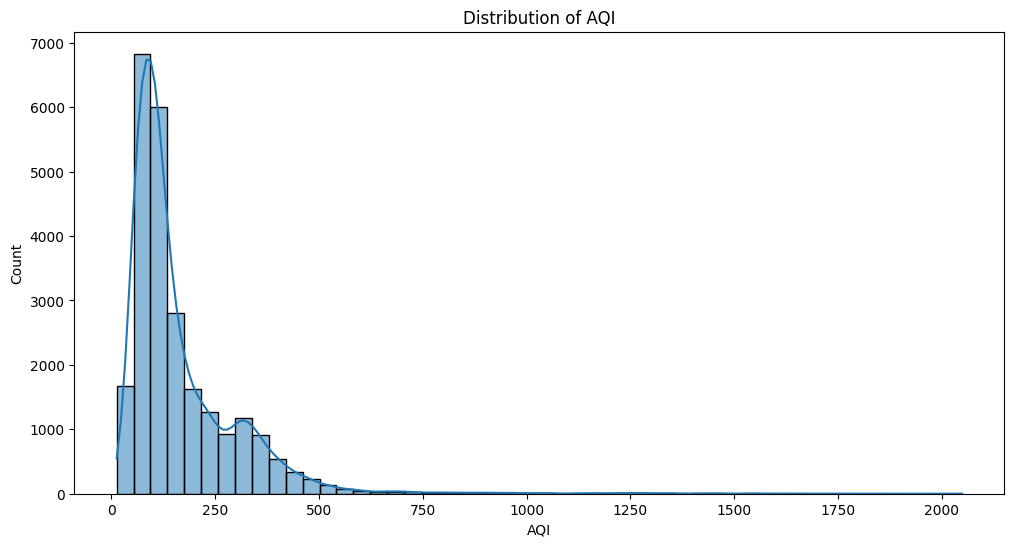

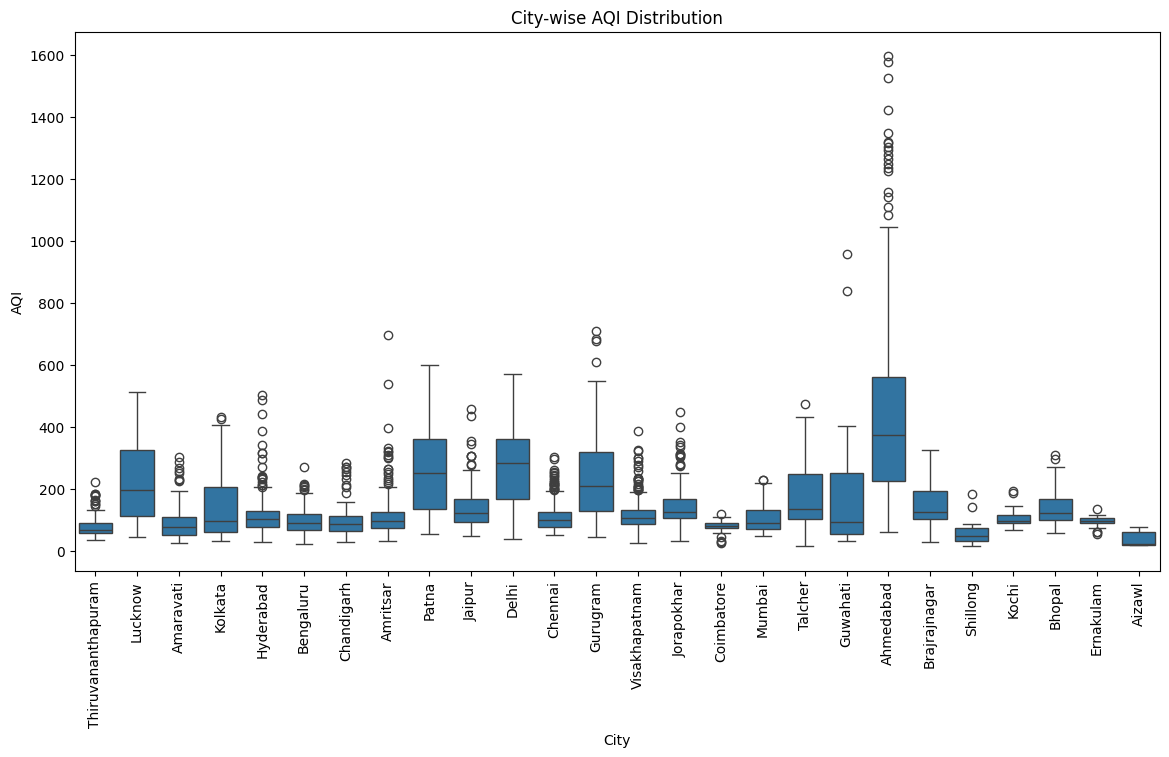

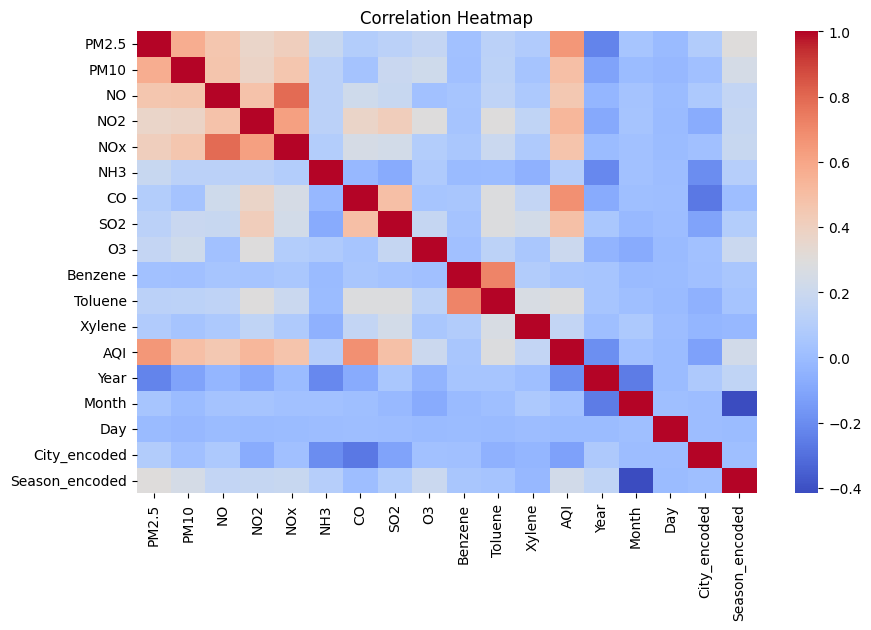

✅ Preprocessing complete. Features shape: (24850, 17)  Target shape: (24850,)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"D:\Air Quality Prediction and Forecasting using Machine Learning\data\raw\city_day.csv")

# -----------------------------
# 1. Convert Date column
# -----------------------------
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

# -----------------------------
# 2. Handle missing values
# -----------------------------
# Drop rows where AQI is missing (cannot train regression without target)
df = df.dropna(subset=["AQI"])

# Fill pollutant missing values with median per city
for col in ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']:
    df[col] = df.groupby("City")[col].transform(lambda x: x.fillna(x.median()))

# Still missing? Fill remaining with overall median
df.fillna(df.median(numeric_only=True), inplace=True)

# -----------------------------
# 3. Encode categorical features
# -----------------------------
from sklearn.preprocessing import LabelEncoder

le_city = LabelEncoder()
df["City_encoded"] = le_city.fit_transform(df["City"])

# -----------------------------
# 4. Feature Engineering
# -----------------------------
# Create "season" feature
def get_season(month):
    if month in [12,1,2]:
        return "Winter"
    elif month in [3,4,5]:
        return "Summer"
    elif month in [6,7,8,9]:
        return "Monsoon"
    else:
        return "Post-Monsoon"

df["Season"] = df["Month"].apply(get_season)
df["Season_encoded"] = LabelEncoder().fit_transform(df["Season"])

# -----------------------------
# 5. EDA - Visualization
# -----------------------------
plt.figure(figsize=(12,6))
sns.histplot(df["AQI"], bins=50, kde=True)
plt.title("Distribution of AQI")
plt.show()

plt.figure(figsize=(14,7))
sns.boxplot(x="City", y="AQI", data=df.sample(5000))  # sample to avoid clutter
plt.xticks(rotation=90)
plt.title("City-wise AQI Distribution")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# -----------------------------
# Final Cleaned Data
# -----------------------------
features = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene',
            'City_encoded','Year','Month','Day','Season_encoded']
target = "AQI"

X = df[features]
y = df[target]

print("✅ Preprocessing complete. Features shape:", X.shape, " Target shape:", y.shape)


In [ ]:
df.dropna(["season,city"])

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Toluene,Xylene,AQI,AQI_Bucket,Year,Month,Day,City_encoded,Season,Season_encoded
28,Ahmedabad,2015-01-29,83.13,107.67,6.93,28.71,33.72,17.055,6.93,49.52,...,0.000,3.14,209.0,Poor,2015,1,29,0,Winter,3
29,Ahmedabad,2015-01-30,79.84,107.67,13.85,28.68,41.08,17.055,13.85,48.49,...,0.000,4.81,328.0,Very Poor,2015,1,30,0,Winter,3
30,Ahmedabad,2015-01-31,94.52,107.67,24.39,32.66,52.61,17.055,24.39,67.39,...,0.010,7.67,514.0,Severe,2015,1,31,0,Winter,3
31,Ahmedabad,2015-02-01,135.99,107.67,43.48,42.08,84.57,17.055,43.48,75.23,...,0.040,25.87,782.0,Severe,2015,2,1,0,Winter,3
32,Ahmedabad,2015-02-02,178.33,107.67,54.56,35.31,72.80,17.055,54.56,55.04,...,0.060,35.61,914.0,Severe,2015,2,2,0,Winter,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.470,0.47,8.55,...,12.070,0.73,41.0,Good,2020,6,27,25,Monsoon,0
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.990,0.52,12.72,...,2.210,0.38,70.0,Satisfactory,2020,6,28,25,Monsoon,0
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.710,0.48,8.42,...,0.010,0.00,68.0,Satisfactory,2020,6,29,25,Monsoon,0
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.030,0.52,9.84,...,0.000,0.00,54.0,Satisfactory,2020,6,30,25,Monsoon,0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

Linear Regression

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("📌 Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))

📌 Linear Regression Results:
MAE: 30.926293794087627
RMSE: 59.04863484372528
R² Score: 0.8095823686648502


Random Forest Regressor

In [7]:
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n📌 Random Forest Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))


📌 Random Forest Results:
MAE: 20.56549698189135
RMSE: 40.110629409167814
R² Score: 0.912136926859158


Feature Importance (RF)

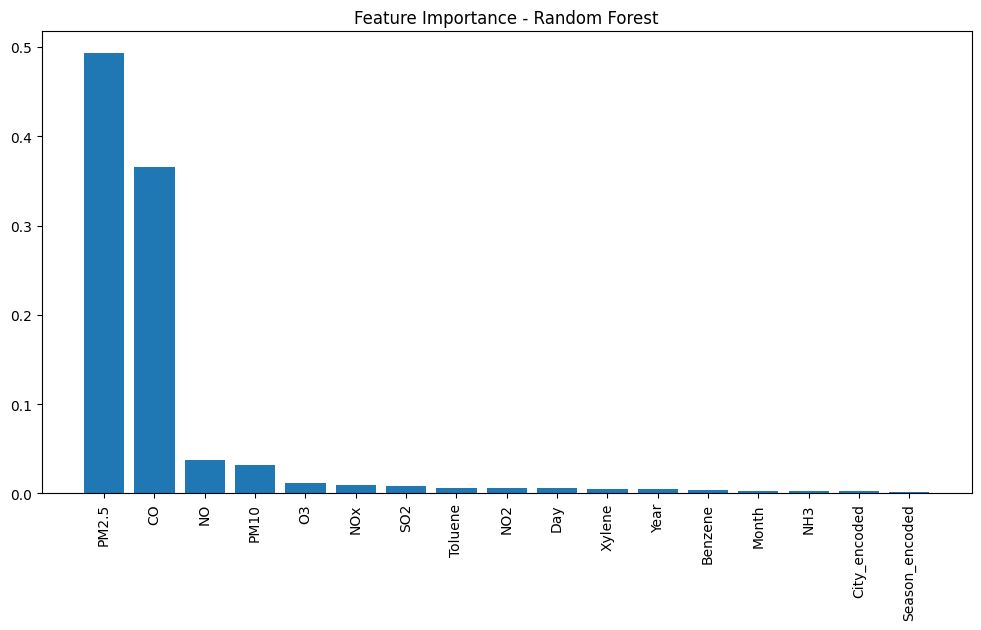

In [9]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

XGBoost

In [10]:
from xgboost import XGBRegressor
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("📌 XGBoost Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R² Score:", r2_score(y_test, y_pred_xgb))

📌 XGBoost Results:
MAE: 20.34485996177259
RMSE: 41.50568985208128
R² Score: 0.9059188302553086


Compare Models (Visualization)